# SPACESHIP TITANIC

# Import Library

In [189]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import xgboost




warnings.filterwarnings('ignore')



# Import Data

In [190]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hesyandi/Portofolio/master/2_Spaceship_Titanic/Datasets/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hesyandi/Portofolio/master/2_Spaceship_Titanic/Datasets/test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [191]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Exploratory Data Analysis

### Data Info

In [192]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [193]:
df_train.shape

(8693, 14)

In [194]:
df_train.groupby(['Transported', 'VIP', 'HomePlanet']).count()

PassengerId  CryoSleep  Cabin  Destination  \
Transported VIP   HomePlanet                                               
False       False Earth              2583       2522   2528         2527   
                  Europa              646        628    629          635   
                  Mars                770        747    754          753   
            True  Europa               67         65     63           65   
                  Mars                 53         53     52           53   
True        False Earth              1904       1857   1867         1864   
                  Europa             1312       1275   1273         1288   
                  Mars                883        864    866          858   
            True  Europa               64         63     63           64   
                  Mars                 10         10     10           10   

                               Age  RoomService  FoodCourt  ShoppingMall  \
Transported VIP   HomePlanet                                               
False       False Earth       2532         2521       2523          2527   
                  Europa       631          631        639           631   
                  Mars         751          757        756           756   
            True  Europa        67           65         66            65   
                  Mars          52           51         53            51   
True        False Earth       1871         1866       1868          1851   
                  Europa      1281         1293       1279          1278   
                  Mars         862          863        862           863   
            True  Europa        64           64         62            63   
                  Mars          10           10          7            10   

                               Spa  VRDeck  Name  
Transported VIP   HomePlanet                      
False       False Earth       2526    2520  2522  
                  Europa       632     635   629  
                  Mars         752     756   752  
            True  Europa        66      67    67  
                  Mars          53      52    53  
True        False Earth       1863    1857  1860  
                  Europa      1283    1288  1285  
                  Mars         866     860   861  
            True  Europa        63      62    62  
                  Mars          10       9     9

In [195]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [196]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [197]:
df_test.shape

(4277, 13)

In [198]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [199]:
df_test.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

### Checking Age Columns

<AxesSubplot:xlabel='Age', ylabel='Density'>

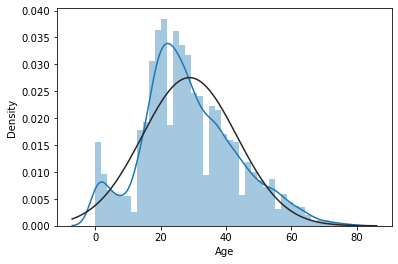

In [200]:
sns.distplot(df_train['Age'], fit = norm)

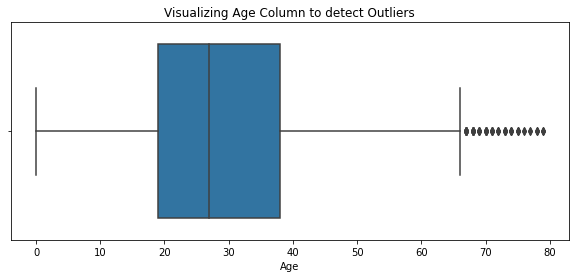

In [201]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(df_train['Age'])
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

### Checking Room Service Columns

<AxesSubplot:xlabel='RoomService', ylabel='Density'>

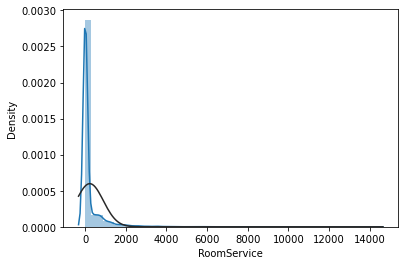

In [202]:
sns.distplot(df_train['RoomService'], fit = norm)

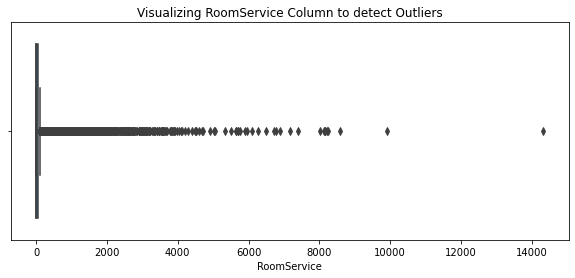

In [203]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(df_train['RoomService'])
ax.set_title('Visualizing RoomService Column to detect Outliers')
plt.show()

### Checking FoodCourt Columns

<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

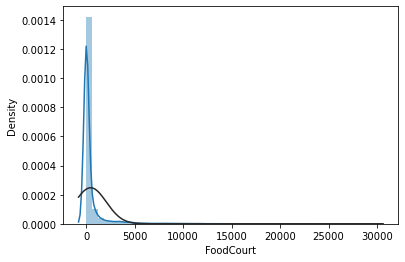

In [204]:
sns.distplot(df_train['FoodCourt'], fit = norm)

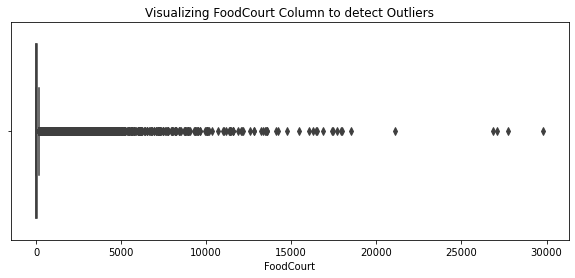

In [205]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(df_train['FoodCourt'])
ax.set_title('Visualizing FoodCourt Column to detect Outliers')
plt.show()

### Checking Shopping Mall Columns

<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

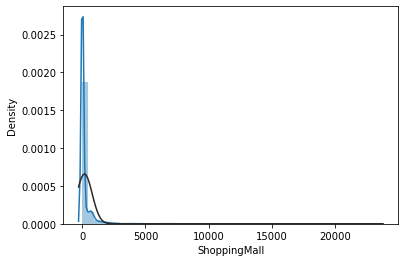

In [206]:
sns.distplot(df_train['ShoppingMall'], fit = norm)

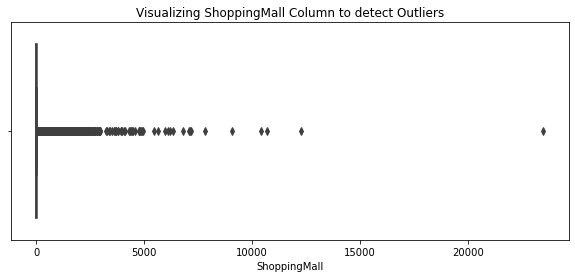

In [207]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(df_train['ShoppingMall'])
ax.set_title('Visualizing ShoppingMall Column to detect Outliers')
plt.show()

### Checking Spa Columns

<AxesSubplot:xlabel='Spa', ylabel='Density'>

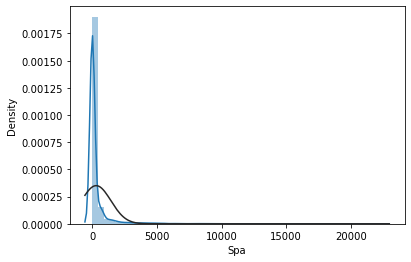

In [208]:
sns.distplot(df_train['Spa'], fit = norm)

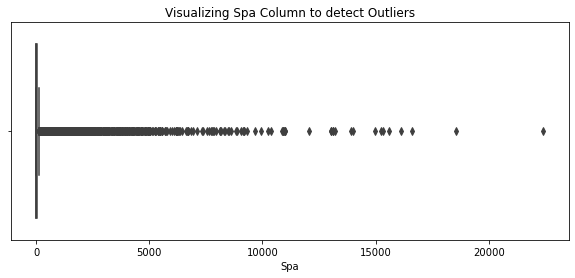

In [209]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(df_train['Spa'])
ax.set_title('Visualizing Spa Column to detect Outliers')
plt.show()

### Checking VRDeck Columns

<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

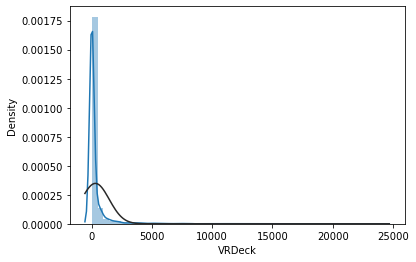

In [210]:
sns.distplot(df_train['VRDeck'], fit = norm)

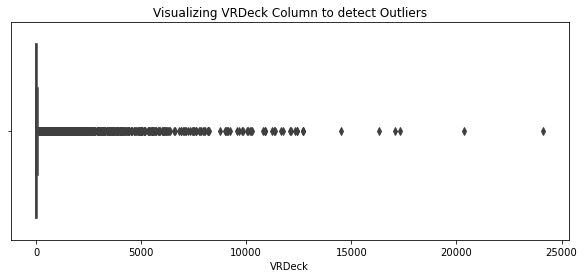

In [211]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(df_train['VRDeck'])
ax.set_title('Visualizing VRDeck Column to detect Outliers')
plt.show()

### Checking Target Variables

<AxesSubplot:xlabel='Transported', ylabel='Density'>

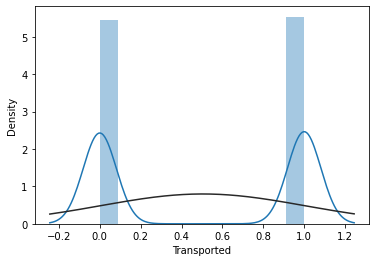

In [212]:
sns.distplot(df_train['Transported'], fit = norm)

### Correlation Between Variables

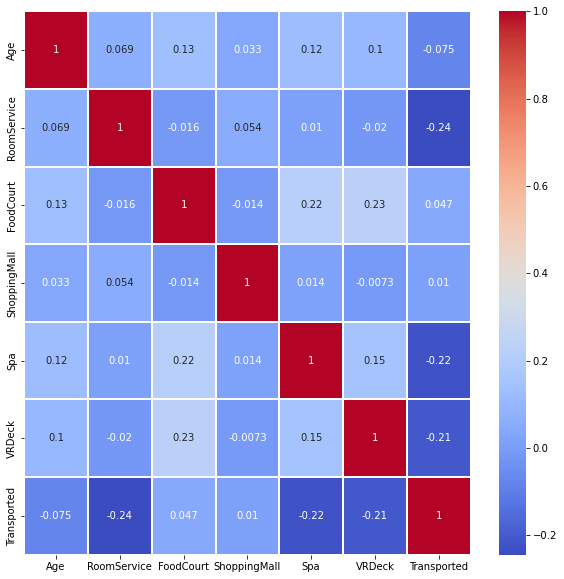

In [213]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, linewidth=2)

In [214]:
corr = df_train.corr()

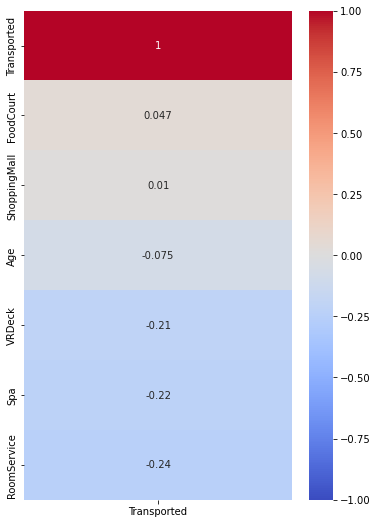

In [215]:
plt.figure(figsize=(6,9))
sns.heatmap(corr[['Transported']].sort_values(by='Transported', ascending=False), cmap='coolwarm', vmin=-1, annot=True)
plt.show()

### Pair Plot

sns.set()
cols = ['FoodCourt', 'ShoppingMall', 'Age', 'VRDeck', 'Spa', 'RoomService']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Data Preprocessing

### Merge Train and Test Data

In [216]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Drop Unimportant Variables

In [217]:
all_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Check Missing Values

In [218]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = all_data.isnull().sum()/all_data.isnull().count()

missingdata = pd.concat([total,percent], axis=1, keys=(['Total','Percent'])) 

missingdata

,Total,Percent
Transported,4277,0.329761
CryoSleep,310,0.023901
ShoppingMall,306,0.023593
Cabin,299,0.023053
VIP,296,0.022822
FoodCourt,289,0.022282
HomePlanet,288,0.022205
Spa,284,0.021897
Destination,274,0.021126
Age,270,0.020817


### Missing Value Treatment

#### Categorical Data

In [219]:
for col in ('HomePlanet', 'Destination', 'Cabin'):
    all_data[col] = all_data[col].fillna('None')

In [220]:
print(all_data['CryoSleep'].mode())
print(all_data['VIP'].mode())

0    False
Name: CryoSleep, dtype: object
0    False
Name: VIP, dtype: object


In [221]:
all_data['CryoSleep'] = all_data['CryoSleep'].fillna(False)
all_data['VIP'] = all_data['VIP'].fillna(False)

In [222]:
all_data['CryoSleep'].mode()

0    False
Name: CryoSleep, dtype: bool

In [223]:
all_data.dtypes

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported      object
dtype: object

#### Numerical Data

In [224]:
numerical = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical:
    all_data[col] = all_data[col].fillna(0)

In [225]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mean())

### Recheck Missing Value

In [226]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = all_data.isnull().sum()/all_data.isnull().count()

missingdata = pd.concat([total,percent], axis=1, keys=(['Total','Percent'])) 

missingdata

,Total,Percent
Transported,4277,0.329761
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Cabin,0,0.000000
Destination,0,0.000000
Age,0,0.000000
VIP,0,0.000000
RoomService,0,0.000000
FoodCourt,0,0.000000
ShoppingMall,0,0.000000


In [227]:
df_train[df_train['Age'] >= 27]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [228]:
q1 = df_train['Age'].quantile(0.25)
q3 = df_train['Age'].quantile(0.75)
print('Quantile 1:', q1)
print('Quantile 3:', q3)
print('Interquartile:', q3 - q1)

qua = df_train['Age'].values
lower_tail = q1 - 1.5 * (q3-q1)
print('Lower tail:', lower_tail)
upper_tail = q3 + 1.5 * (q3-q1)
print('Upper tail:', upper_tail)
print('Median:', df_train['Age'].median())

Quantile 1: 19.0
Quantile 3: 38.0
Interquartile: 19.0
Lower tail: -9.5
Upper tail: 66.5
Median: 27.0


In [229]:
for i in df_train['Age']:
    if i > upper_tail or i < lower_tail:
        df_train['Age'] = df_train['Age'].replace(i, 27)

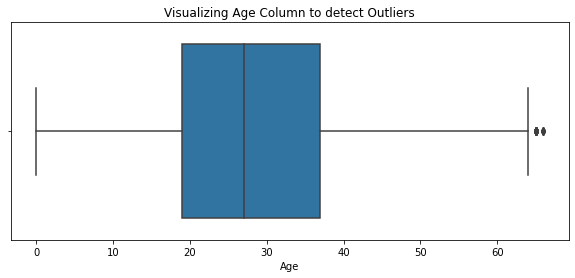

In [230]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(df_train['Age'])
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

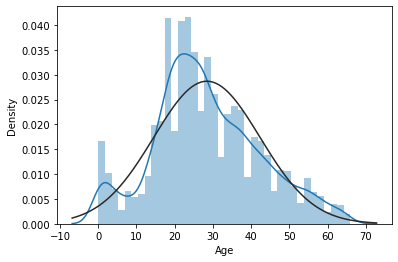

In [231]:
sns.distplot(df_train['Age'], fit=norm)

In [232]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.429175,224.687617,458.077203,173.729169,311.138778,304.854791
std,13.911704,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,66.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Split Variables

In [233]:
cabin = pd.DataFrame((all_data['Cabin'].str.split('/', expand=True)).rename(columns={0:'Deck', 1:'Num', 2:'Side'}))

cabin

,Deck,Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
12965,G,1496,S
12966,None,None,None
12967,D,296,P
12968,D,297,P


In [234]:
all_data.drop('Cabin', axis=1, inplace=True)

all_join = pd.DataFrame(all_data.join(cabin))

## Feature Engineering

### Label Encoder

In [235]:
lbl = LabelEncoder()
lbl.fit(list(all_join['VIP'].values)) 
all_join['VIP'] = lbl.transform(list(all_join['VIP'].values))

all_join.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [236]:
all_join = pd.get_dummies(all_join, columns=['CryoSleep', 'HomePlanet', 'Deck', 'Side', 'Destination', 'Transported'], drop_first=True)

all_join

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,CryoSleep_True,HomePlanet_Europa,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_S,Destination_None,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported_True
0,39.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,24.000000,0,109.0,9.0,25.0,549.0,44.0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
2,58.000000,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,33.000000,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,16.000000,0,303.0,70.0,151.0,565.0,2.0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.000000,0,0.0,0.0,0.0,0.0,0.0,1496,1,0,...,0,0,1,0,0,1,0,0,1,0
12966,42.000000,0,0.0,847.0,17.0,10.0,144.0,None,0,0,...,0,0,0,1,0,0,0,0,1,0
12967,28.771969,0,0.0,0.0,0.0,0.0,0.0,296,1,0,...,0,0,0,0,0,0,0,0,0,0
12968,28.771969,0,0.0,2680.0,0.0,0.0,523.0,297,0,1,...,0,0,0,0,0,0,1,0,0,0


In [237]:
all_join.replace({'Num':{None:all_join['Num'].mode()}})
all_join['Num'] = all_join['Num'].fillna(82)

In [238]:
all_join = pd.DataFrame(all_join)
all_join.dtypes

Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Num                           object
CryoSleep_True                 uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
HomePlanet_None                uint8
Deck_B                         uint8
Deck_C                         uint8
Deck_D                         uint8
Deck_E                         uint8
Deck_F                         uint8
Deck_G                         uint8
Deck_None                      uint8
Deck_T                         uint8
Side_S                         uint8
Destination_None               uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
Transported_True               uint8
dtype: object

In [239]:
all_join.describe()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_True,HomePlanet_Europa,HomePlanet_Mars,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_S,Destination_None,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported_True
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,...,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,0.021049,218.378026,441.890979,170.779491,301.722282,300.450270,0.353200,0.241557,0.206939,...,0.102005,0.326831,0.291519,0.023053,0.000848,0.491981,0.021126,0.091288,0.683963,0.337548
std,14.236710,0.143552,641.766201,1568.038076,584.153630,1118.746785,1168.655639,0.477983,0.428044,0.405127,...,0.302666,0.469073,0.454479,0.150078,0.029111,0.499955,0.143809,0.288029,0.464945,0.472892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,37.000000,0.000000,42.750000,62.750000,23.000000,50.000000,36.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling With Outlier Data

In [240]:
for x in all_join['RoomService']:
    if x != 0:
        all_join['RoomService'] = all_join['RoomService'].replace(x, 1)

for x in all_join['FoodCourt']:
    if x != 0:
        all_join['FoodCourt'] = all_join['FoodCourt'].replace(x, 1)

for x in all_join['ShoppingMall']:
    if x != 0:
        all_join['ShoppingMall'] = all_join['ShoppingMall'].replace(x, 1)

for x in all_join['Spa']:
    if x != 0:
        all_join['Spa'] = all_join['Spa'].replace(x, 1)

for x in all_join['VRDeck']:
    if x != 0:
        all_join['VRDeck'] = all_join['VRDeck'].replace(x, 1)

In [241]:
print(all_join['RoomService'].unique())
print(all_join['FoodCourt'].unique())
print(all_join['ShoppingMall'].unique())
print(all_join['Spa'].unique())
print(all_join['VRDeck'].unique())

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


In [242]:
all_join.describe()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_True,HomePlanet_Europa,HomePlanet_Mars,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_S,Destination_None,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported_True
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,...,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,0.021049,0.339553,0.349653,0.334079,0.366307,0.343099,0.353200,0.241557,0.206939,...,0.102005,0.326831,0.291519,0.023053,0.000848,0.491981,0.021126,0.091288,0.683963,0.337548
std,14.236710,0.143552,0.473576,0.476879,0.471686,0.481813,0.474763,0.477983,0.428044,0.405127,...,0.302666,0.469073,0.454479,0.150078,0.029111,0.499955,0.143809,0.288029,0.464945,0.472892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,37.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
mms = MinMaxScaler()

mms.fit(all_join)
all_join = mms.transform(all_join)

In [244]:
allnew = pd.DataFrame(all_join)

allnew.rename(columns={0:'Age', 1:'VIP', 2:'RoomService', 3:'FoodCourt', 4:'ShoppingMall', 5:'Spa', \
    6:'VRDeck', 7:'Num', 8:'CryoSleep_True', 9:'HomePlanet_Europa', 10:'HomePlanet_Mars', 11:'HomePlanet_None', \
    12:'Deck_B', 13:'Deck_C', 14:'Deck_D', 15:'Deck_E', 16:'Deck_F', 17:'Deck_G', 18:'Deck_None', 19:'Deck_T', 20:'Side_S',\
    21:'Destination_None', 22:'Destination_PSO J318.5-22', 23:'Destination_TRAPPIST-1e', 24:'Transported'}, inplace=True)



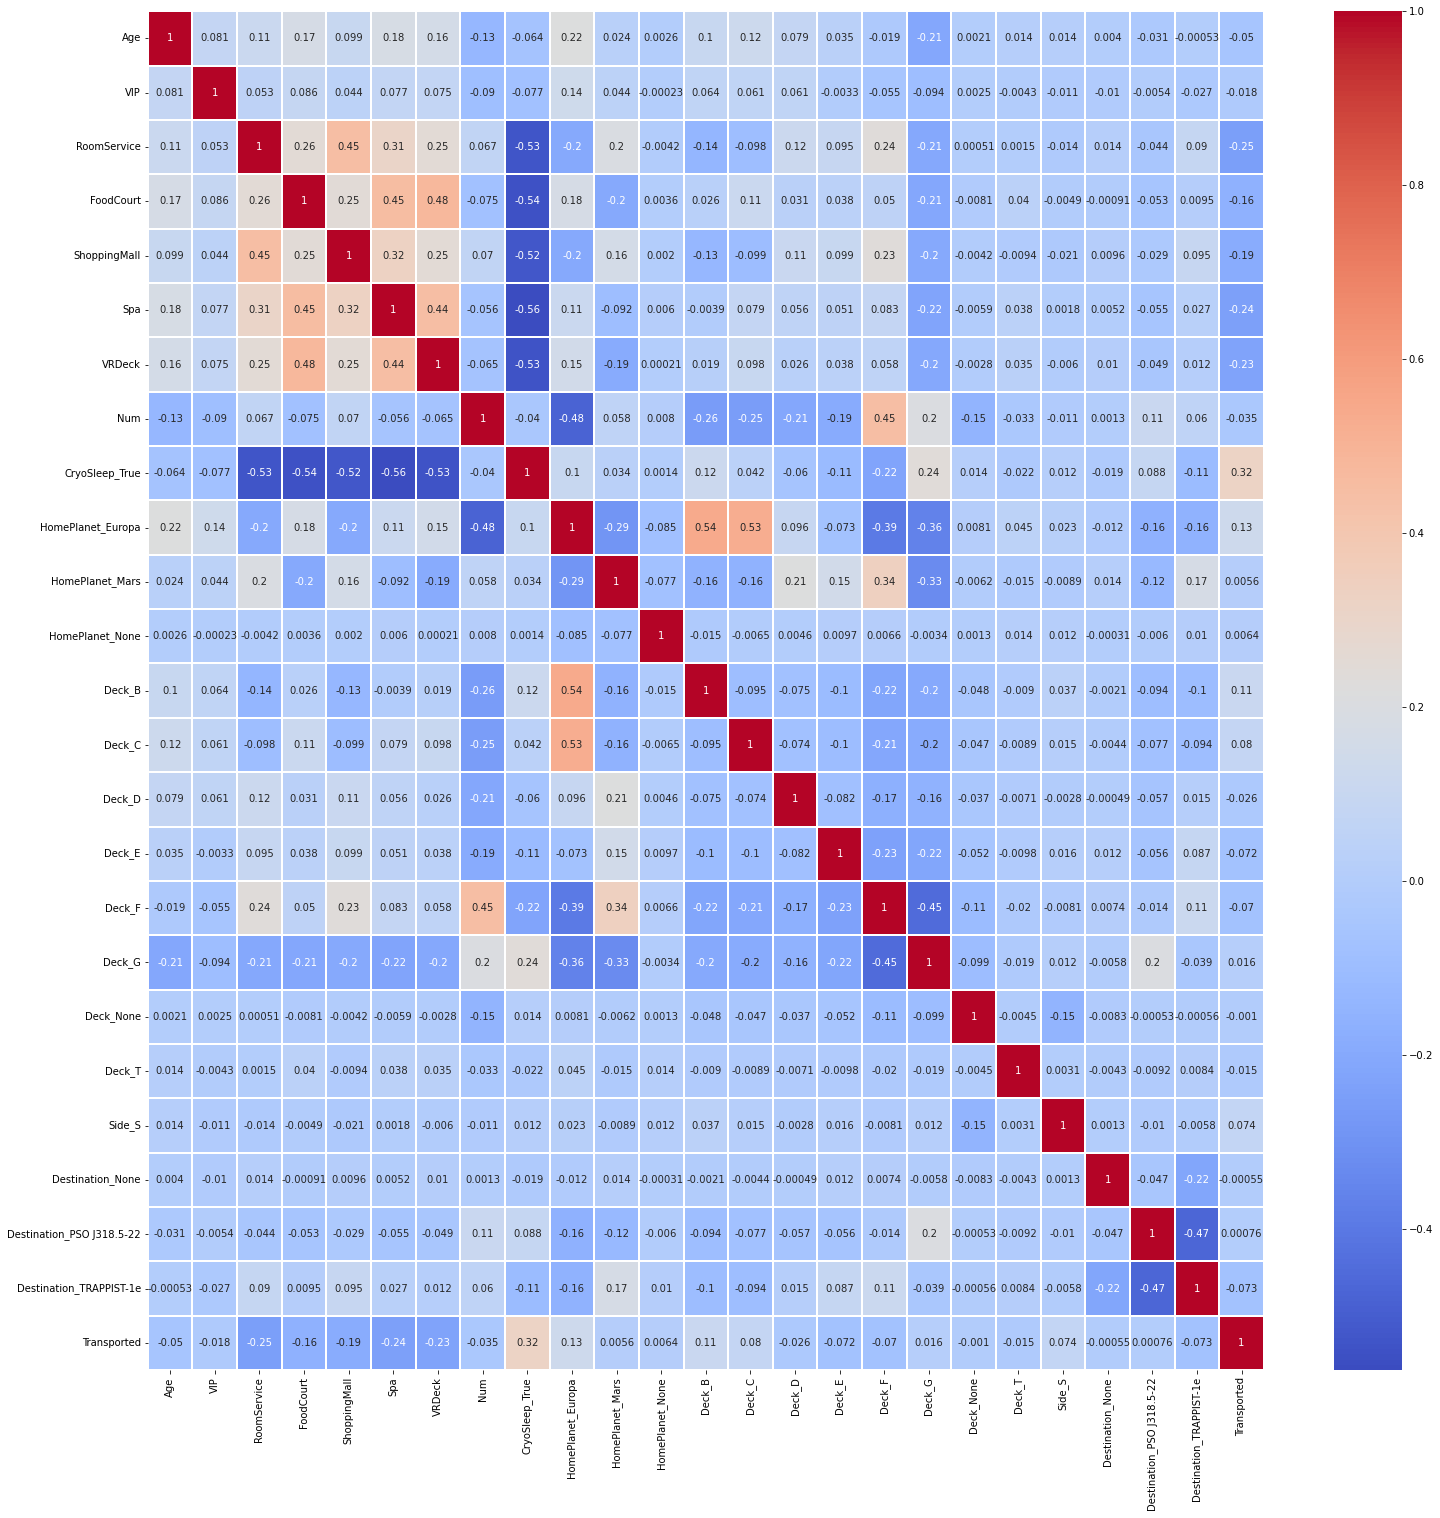

In [245]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(allnew.corr(), cmap='coolwarm', annot=True, linewidth=2)

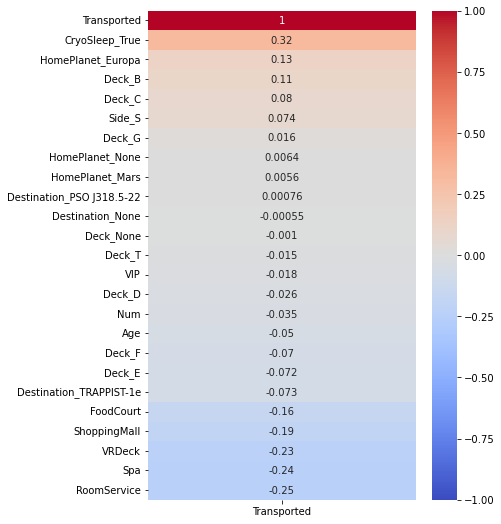

In [246]:
plt.figure(figsize=(6,9))
corr2 = allnew.corr()
sns.heatmap(corr2[['Transported']].sort_values(by='Transported', ascending=False), cmap='coolwarm', vmin=-1, annot=True)
plt.show()

### Separate Train and Test Data

In [247]:
Train = allnew[:ntrain]
Test = allnew[ntrain:]

X_train = Train.drop('Transported', axis=1)
y_train = Train['Transported']
X_test = Test.drop('Transported', axis=1)

X_train.shape, X_test.shape, y_train.shape

((8693, 24), (4277, 24), (8693,))

## Modelling

### K Fold Cross Validation

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score) 
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) 
    score = [r2_val_score.mean()]
    return score

### 1. Decision Tree Classification

In [248]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [249]:
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1. 0. 1. ... 1. 0. 0.]


cm = confusion_matrix(y_train, y_pred_dt)

x_axis_labels = ['Tranported', 'Not Transported']
y_axis_labels = ['Tranported', 'Not Transported']

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

### 2. KNN Classification

In [250]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

### 3. SVM

In [251]:
sv = svm.SVR()
sv.fit(X_train, y_train)

SVR()

### 4. Naives Bayes

In [252]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### 5. Random Forest Regressor

In [253]:
rb = RandomForestClassifier()
rb.fit(X_train, y_train)

RandomForestClassifier()

## Prediction

In [254]:
pred = kn.predict(X_test)
dfPred = pd.DataFrame(pred).rename(columns={0:'Transported'}).replace({'Transported':{1:True, 0:False}})
dfPred

,Transported
0,True
1,True
2,True
3,False
4,False
...,...
4272,False
4273,False
4274,True
4275,False


In [255]:
dfId = pd.DataFrame(df_test['PassengerId'])

In [256]:
dfId.join(dfPred)

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [257]:
submit = dfId.join(dfPred)

submit.to_csv('Submit.csv', index=False)